In [1]:
library("microbiome")
library("dplyr")
library("readr")
library("latex2exp")
library("patchwork")
library("phyloseq")

Warning message:
“package ‘microbiome’ was built under R version 4.0.3”
Loading required package: phyloseq

Warning message:
“package ‘phyloseq’ was built under R version 4.0.3”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”

microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘latex2exp’ was built under R version 4.0.

In [2]:
hPoDM <- read_csv("hPoDM.csv")


── Column specification ─────────────────────────────────────────────────────────────────────────────────
cols(
  `0 strains` = col_double(),
  `1 strain` = col_double(),
  `2 strains` = col_double(),
  `3 or more strains` = col_double()
)




In [3]:
hPoDM <- plot_composition(microbiome::transform(phyloseq(otu_table(hPoDM, taxa_are_rows=FALSE), sample_data(hPoDM)), "compositional"), 
                 plot.type="barplot") + scale_fill_brewer(palette = "Paired") + scale_x_discrete( breaks=NULL) +xlab("Simulations") + 
theme(panel.background = element_rect(fill = "transparent")) + labs(fill="", x=TeX("Simulations, hPoDM  $\\zeta =1$"), y="")

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



In [4]:
expected_counts <- read_csv("expected_counts.csv")

expected_counts <- plot_composition(microbiome::transform(phyloseq(otu_table(expected_counts, taxa_are_rows=FALSE), sample_data(expected_counts)), "compositional"), 
                 plot.type="barplot") + scale_fill_brewer(palette = "Paired") + scale_x_discrete( breaks=NULL) +xlab("Expected Counts under hPoMu") + 
theme(panel.background = element_rect(fill = "transparent"), legend.position="none") + labs(fill="", y="Fraction of droplets having...") 


── Column specification ─────────────────────────────────────────────────────────────────────────────────
cols(
  `0 strains` = col_double(),
  `1 strain` = col_double(),
  `2 strains` = col_double(),
  `3 or more strains` = col_double()
)


Warning message in all(sample(round(prod(dim(abundances(x)))/10))):
“coercing argument of type 'double' to logical”
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



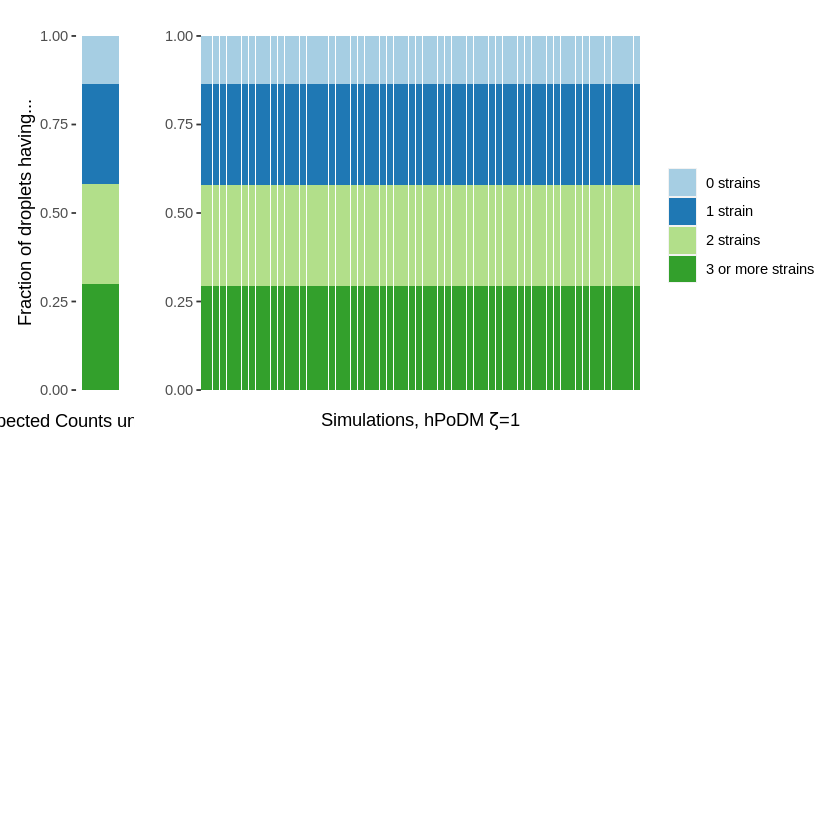

In [5]:
expected_counts + hPoDM + plot_layout(ncol=2, widths=c(10,90), heights=c(50,50))

In [6]:
ggsave(expected_counts + hPoDM + plot_layout(ncol=2, widths=c(10,90)), filename="picky_observed_v_expected.png", device="png", height=5, width=25)